In [40]:
print("hello world")

hello world


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [42]:
# extra para
DEVICE=torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH=64
EPOCHS=3
LR=1e-3

In [43]:
# data
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
train_ds = datasets.MNIST(root=".", train=True,  download=True, transform=transform)
test_ds  = datasets.MNIST(root=".", train=False, download=True, transform=transform)
train_dl=DataLoader(train_ds,batch_size=BATCH,shuffle=True)
test_dl=DataLoader(test_ds,batch_size=BATCH)

In [44]:
class Net(nn.Module):
    def __init__(self):
        super().__init__(),
        self.flatten=nn.Flatten()
        self.fc=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
    def forward(self,x):
        x=self.flatten(x)
        return self.fc(x)
model=Net().to(DEVICE)

In [45]:
# loss and optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=LR)

In [46]:
def train(epoch):
    model.train()
    bar=tqdm(train_dl,desc=f"Epoch{epoch}")
    for x,y in bar:
        x,y=x.to(DEVICE),y.to(DEVICE)
        pred=model(x)
        loss=criterion(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        bar.set_postfix(loss=loss.item())


In [47]:
#test
def test():
    model.eval()
    correct=total=0
    for x,y in test_dl:
        x,y=x.to(DEVICE),y.to(DEVICE)
        pred=model(x)
        correct+=(pred.argmax(1)==y).sum().item()
        total+=y.size(0)
    print(f"Test Acc:{correct/total:.2%}")

In [48]:
# done
for e in range(1,EPOCHS+1):
    train(e)
    test()

Epoch1: 100%|██████████| 938/938 [00:18<00:00, 49.84it/s, loss=0.121] 


Test Acc:95.88%


Epoch2: 100%|██████████| 938/938 [00:18<00:00, 51.32it/s, loss=0.269]  


Test Acc:97.02%


Epoch3: 100%|██████████| 938/938 [00:18<00:00, 50.98it/s, loss=0.0521] 


Test Acc:97.15%


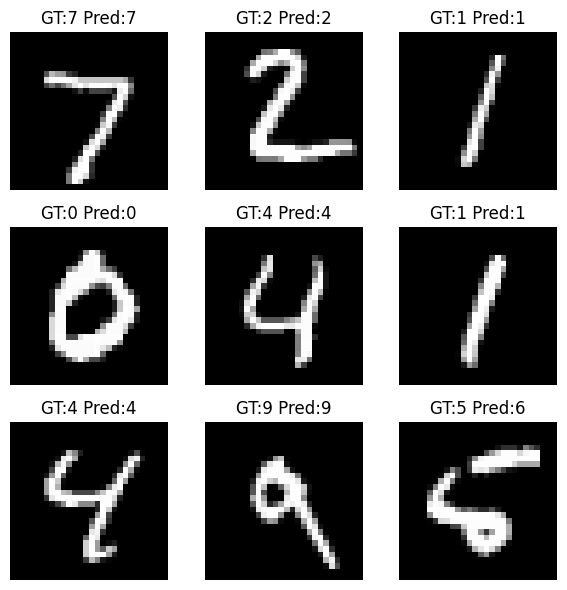

In [49]:
# show result
model.eval()
examples=enumerate(test_dl)
batch_idx,(data,target)=next(examples)
data,target=data[:9].to(DEVICE),target[:9]
out=model(data)
pred=out.argmax(dim=1).cpu()

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(data[i].cpu().squeeze(), cmap='gray')
    plt.title(f"GT:{target[i]} Pred:{pred[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()